### INTRODUCTION

A Bagging classifier is an ensemble meta-estimator that fits base classifiers each on random subsets of the original dataset and then aggregate their individual predictions (either by voting or by averaging) to form a final prediction

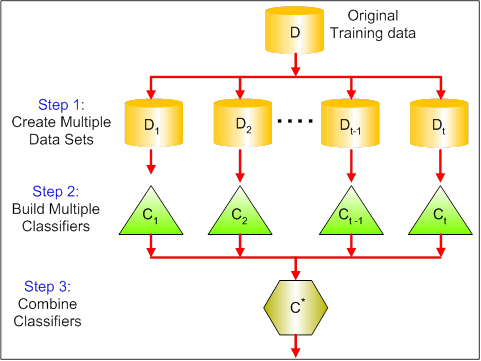

# Importing Libraries

In [1]:
#Importing required libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import f1_score,classification_report

import warnings
warnings.filterwarnings('ignore')

### Loading the dataset

In [2]:
#reading the data
data=pd.read_csv('Loan data cleaned.csv')

In [3]:
#shape of the data
data.shape

(4368, 64)

In [4]:
#first five rows of the data
data.head()

,loannumber,loanamount,totaldue,termdays,good_bad_flag,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,employment_status_clients,...,ploan_additional charges_50%_x,ploan_additional charges_75%_x,ploan_additional charges_max_x,ploan_additional charges_mean_y,ploan_additional charges_min_y,ploan_additional charges_25%_y,ploan_additional charges_50%_y,ploan_additional charges_75%_y,ploan_additional charges_max_y,not_repaid_percentage
0,12,30000.0,34500.0,30,Good,Other,3.432010,6.433055,Diamond Bank,Permanent,...,3800.000000,4500.000000,4500.000000,3900.000000,3000.000000,3400.000000,3800.000000,4500.000000,4500.000000,64.000000
1,2,15000.0,17250.0,30,Good,Savings,3.885298,7.320700,GT Bank,Permanent,...,2665.558293,3037.525723,3543.851778,2730.359972,2102.661161,2364.738902,2665.558293,3037.525723,3543.851778,63.573297
2,7,20000.0,22250.0,15,Good,Other,11.139350,10.292041,EcoBank,Permanent,...,1500.000000,1500.000000,3000.000000,1750.000000,1500.000000,1500.000000,1500.000000,1500.000000,3000.000000,50.000000
3,3,10000.0,11500.0,15,Good,Savings,3.985770,7.491708,First Bank,Permanent,...,2250.000000,2625.000000,3000.000000,2250.000000,1500.000000,1875.000000,2250.000000,2625.000000,3000.000000,0.000000
4,9,40000.0,44000.0,30,Good,Other,7.457913,9.076574,GT Bank,Permanent,...,3800.000000,5100.000000,9000.000000,4800.000000,3000.000000,3000.000000,3800.000000,5100.000000,9000.000000,100.000000


In [5]:
#checking missing values in the data
data.isnull().sum()

loannumber                        0
loanamount                        0
totaldue                          0
termdays                          0
good_bad_flag                     0
                                 ..
ploan_additional charges_25%_y    0
ploan_additional charges_50%_y    0
ploan_additional charges_75%_y    0
ploan_additional charges_max_y    0
not_repaid_percentage             0
Length: 64, dtype: int64

In [6]:
#make dummies of categorical columns('bank_account_type','bank_name_clients','employment_status_clients')
data=pd.get_dummies(data=data,columns=['bank_account_type','bank_name_clients','employment_status_clients'],drop_first=True)

### Separating independent and dependent variables.

In [7]:
x = data.drop(['good_bad_flag'], axis=1)
y = data['good_bad_flag'].replace({'Good':0, 'Bad':1})

### Creating the train and test dataset

In [8]:
#import the train-test split
from sklearn.model_selection import train_test_split

In [9]:
#divide into train and test sets
train_x,test_x,train_y,test_y = train_test_split(x,y, random_state = 101, stratify=y)

In [10]:
#Scalig the train and testing datasets
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(train_x)
train_x = pd.DataFrame(x_train_scaled, columns=train_x.columns)

x_test_scaled = scaler.transform(test_x)
test_x = pd.DataFrame(x_test_scaled, columns=test_x.columns)

## Building a Model

In [11]:
from sklearn.ensemble import BaggingClassifier

### --Taking Logistic Regression as base estimator

In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
clf = BaggingClassifier(base_estimator=LogisticRegression(class_weight='balanced',random_state=101),n_estimators=10, random_state=101).fit(train_x, train_y)

In [14]:
pred_train=clf.predict(train_x)
pred_test=clf.predict(test_x)

In [15]:
print('\033[1m',"Classification Report for training data",'\033[0m')
print(classification_report(pred_train, train_y))

 Classification Report for training data 
              precision    recall  f1-score   support

           0       0.72      0.87      0.79      2111
           1       0.62      0.38      0.47      1165

    accuracy                           0.70      3276
   macro avg       0.67      0.63      0.63      3276
weighted avg       0.68      0.70      0.68      3276



In [16]:
print('\033[1m',"Classification Report for test data",'\033[0m')
print(classification_report(pred_test, test_y))

 Classification Report for test data 
              precision    recall  f1-score   support

           0       0.72      0.85      0.78       718
           1       0.55      0.35      0.43       374

    accuracy                           0.68      1092
   macro avg       0.64      0.60      0.60      1092
weighted avg       0.66      0.68      0.66      1092



###  --Taking DT as base estimator

### 1. Bagging Decision Trees(with default parameters)

In [22]:
from sklearn.tree import DecisionTreeClassifier as dt

In [20]:
clf = BaggingClassifier(base_estimator=dt(random_state=101)).fit(train_x, train_y)

In [21]:
pred_train=clf.predict(train_x)
pred_test=clf.predict(test_x)

In [24]:
print('\033[1m',"Classification Report for training data",'\033[0m')
print(classification_report(pred_train, train_y))

 Classification Report for training data 
              precision    recall  f1-score   support

           0       1.00      0.97      0.99      2631
           1       0.90      1.00      0.94       645

    accuracy                           0.98      3276
   macro avg       0.95      0.98      0.97      3276
weighted avg       0.98      0.98      0.98      3276



In [25]:
print('\033[1m',"Classification Report for test data",'\033[0m')
print(classification_report(pred_test, test_y))

 Classification Report for test data 
              precision    recall  f1-score   support

           0       0.95      0.81      0.87      1001
           1       0.20      0.52      0.29        91

    accuracy                           0.78      1092
   macro avg       0.57      0.66      0.58      1092
weighted avg       0.89      0.78      0.82      1092



### 2. Bagging Decision Trees (with previous tunned parameters)

In [26]:
clf = BaggingClassifier(base_estimator=dt(class_weight='balanced',random_state=101,criterion='gini',max_depth=4,max_leaf_nodes=15,min_samples_split=30),n_estimators=20, random_state=101).fit(train_x, train_y)

In [27]:
pred_train=clf.predict(train_x)
pred_test=clf.predict(test_x)

In [28]:
print('\033[1m',"Classification Report for training data",'\033[0m')
print(classification_report(pred_train, train_y))

 Classification Report for training data 
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      2453
           1       0.58      0.50      0.53       823

    accuracy                           0.78      3276
   macro avg       0.71      0.69      0.70      3276
weighted avg       0.77      0.78      0.78      3276



In [29]:
print('\033[1m',"Classification Report for test data",'\033[0m')
print(classification_report(pred_test, test_y))

 Classification Report for test data 
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       855
           1       0.45      0.45      0.45       237

    accuracy                           0.76      1092
   macro avg       0.65      0.65      0.65      1092
weighted avg       0.76      0.76      0.76      1092



### 3.  Bagging Decision Trees (using Random Search)

In [13]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold

In [14]:
param_grid = {'n_estimators': [int(round(i)) for i in np.linspace(50,1000,50)],
              'max_samples': [0.8,0.9,1.0],
              'max_features': [0.2,0.4,0.6,0.8,1.0],
              'bootstrap':[True,False],
              'bootstrap_features':[True,False]}

In [15]:
dt = dt(random_state=101, class_weight='balanced')
bc_dt = BaggingClassifier(random_state=101, base_estimator=dt)

In [16]:
rsearch = RandomizedSearchCV(estimator=bc_dt, n_iter=50, cv=StratifiedKFold(n_splits=5), 
                             n_jobs=-1, verbose=2, param_distributions=param_grid, 
                             random_state=101, scoring='f1').fit(train_x, train_y)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed: 14.7min finished


In [20]:
rsearch.best_params_

{'n_estimators': 922,
 'max_samples': 0.8,
 'max_features': 0.2,
 'bootstrap_features': True,
 'bootstrap': True}

In [23]:
clf = BaggingClassifier(base_estimator=dt(class_weight='balanced',random_state=101),n_estimators=922,bootstrap_features=True,bootstrap=True,max_samples=0.8,max_features=0.2, random_state=101).fit(train_x, train_y)

In [24]:
pred_train=clf.predict(train_x)
pred_test=clf.predict(test_x)

In [25]:
print('\033[1m',"Classification Report for training data",'\033[0m')
print(classification_report(pred_train, train_y))

 Classification Report for training data 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2568
           1       0.99      1.00      0.99       708

    accuracy                           1.00      3276
   macro avg       0.99      1.00      1.00      3276
weighted avg       1.00      1.00      1.00      3276



In [26]:
print('\033[1m',"Classification Report for test data",'\033[0m')
print(classification_report(pred_test, test_y))

 Classification Report for test data 
              precision    recall  f1-score   support

           0       0.95      0.81      0.88      1000
           1       0.22      0.58      0.32        92

    accuracy                           0.79      1092
   macro avg       0.59      0.70      0.60      1092
weighted avg       0.89      0.79      0.83      1092



###  --KNN as base estimator

In [12]:
from sklearn.neighbors import KNeighborsClassifier as knn

In [13]:
n_neigh=[5,7,10,15,20,30]
train_score=[]
test_score=[]
for i in n_neigh:
    clf = BaggingClassifier(base_estimator=knn(n_neighbors=i)).fit(train_x, train_y)
    pred_train=clf.predict(train_x)
    pred_test=clf.predict(test_x)
    f1_train=f1_score(train_y,pred_train)
    f1_test=f1_score(test_y,pred_test)
    train_score.append(f1_train)
    test_score.append(f1_test)

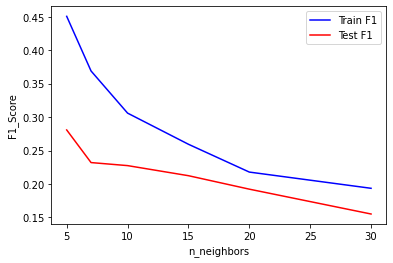

In [15]:
plt.plot(n_neigh, train_score, 'b', label="Train F1")
plt.plot(n_neigh, test_score, 'r', label="Test F1")
plt.xlabel("n_neighbors")
plt.ylabel("F1_Score")
plt.legend()

In [41]:
clf = BaggingClassifier(base_estimator=knn(n_neighbors=10)).fit(train_x, train_y)

In [42]:
pred_train=clf.predict(train_x)
pred_test=clf.predict(test_x)

In [43]:
print('\033[1m',"Classification Report for training data",'\033[0m')
print(classification_report(pred_train, train_y))

 Classification Report for training data 
              precision    recall  f1-score   support

           0       0.97      0.82      0.89      3048
           1       0.21      0.67      0.32       228

    accuracy                           0.81      3276
   macro avg       0.59      0.74      0.61      3276
weighted avg       0.92      0.81      0.85      3276



In [44]:
print('\033[1m',"Classification Report for test data",'\033[0m')
print(classification_report(pred_test, test_y))

 Classification Report for test data 
              precision    recall  f1-score   support

           0       0.96      0.80      0.87      1026
           1       0.14      0.52      0.22        66

    accuracy                           0.78      1092
   macro avg       0.55      0.66      0.55      1092
weighted avg       0.91      0.78      0.84      1092

